In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from sklearn import decomposition

In [15]:
# Set display options
pd.set_option("display.max_rows", 15)
pd.options.mode.chained_assignment = None

# File paths
dataset_folder = 'Datasets'
filename1 = f'{dataset_folder}/data11tumors2.csv'
filename2 = f'{dataset_folder}/plasma_tumor.csv'
filename3 = f'{dataset_folder}/brain_tumor.csv'

# Reading the CSV files
training_data1 = pd.read_csv(filename1)
training_data2 = pd.read_csv(filename2)
training_data3 = pd.read_csv(filename3)

# Displaying the data from the three CSV files
print("Data from the first CSV file (data11tumors2.csv):")
print(training_data1)
print("\nData from the second CSV file (plasma_tumor.csv):")
print(training_data2)
print("\nData from the third CSV file (brain_tumor.csv):")
print(training_data3)


Data from the first CSV file (data11tumors2.csv):
     Class   D1   D2   D3  D4   D5   D6    D7   D8    D9  ...  D12524  D12525  \
0        7  153  228   32  30  -36   48   984  -19   537  ...     100      30   
1        7  154   99   43  55   66   63  5051  -26  1001  ...      27      43   
2        7   84   85   19  28 -104   28  2387  -80  1131  ...     -32      51   
3        7  234  169   40  36   81    6  2657   -6  1214  ...      43      52   
4        7  104   58   42  13  107    5  3562   18  1464  ...     159      42   
..     ...  ...  ...  ...  ..  ...  ...   ...  ...   ...  ...     ...     ...   
169      0  157  578   40  58    5  -49    57  -29  3306  ...       4      45   
170      0  286  882  110 -19 -142  -66    -5   23  2701  ...     -91     130   
171      0  579  667   55 -41  -98 -138  -164  -61  2812  ...    -110     107   
172      0  252  582   88   3   44 -162   553 -150  2020  ...     -66      92   
173      0   83  420   14  84   12    1   153  -38  1833  .

In [16]:
# Concatenate the dataframes
training_data = pd.concat([training_data1, training_data2, training_data3], ignore_index=True)

# Display the combined dataframe
print(training_data)


     Class   D1   D2   D3  D4   D5   D6    D7   D8    D9  ...  D12524  D12525  \
0        7  153  228   32  30  -36   48   984  -19   537  ...     100      30   
1        7  154   99   43  55   66   63  5051  -26  1001  ...      27      43   
2        7   84   85   19  28 -104   28  2387  -80  1131  ...     -32      51   
3        7  234  169   40  36   81    6  2657   -6  1214  ...      43      52   
4        7  104   58   42  13  107    5  3562   18  1464  ...     159      42   
..     ...  ...  ...  ...  ..  ...  ...   ...  ...   ...  ...     ...     ...   
517      0  150  578   40  59   16  -51    16  -31  3280  ...       6      45   
518      0  292  900  111 -17 -132  -67   -33  -50  2676  ...     -94     128   
519      0  592  665   54 -39 -101 -131  -160  -36  2735  ...    -108     104   
520      0  252  575   88   4   44 -167   576 -119  2045  ...     -63      95   
521      0   99  410   15  86    5    1   115  -40  1744  ...      -2      79   

     D12526  D12527  D12528

In [17]:
training_data.describe()

Class          D1           D2          D3           D4  \
count  522.000000  522.000000   522.000000  522.000000   522.000000   
mean     4.126437  218.344828   537.446360   71.601533    83.657088   
std      3.173685  117.286482   269.053809   43.737551   122.380386   
min      0.000000 -124.000000    12.000000  -24.000000   -83.000000   
25%      2.000000  148.250000   359.000000   44.000000    24.250000   
50%      3.000000  208.500000   515.000000   65.000000    64.500000   
75%      7.000000  284.500000   702.000000   88.000000   110.750000   
max     10.000000  625.000000  1423.000000  249.000000  1307.000000   

               D5          D6           D7            D8           D9  ...  \
count  522.000000  522.000000   522.000000    522.000000   522.000000  ...   
mean   -67.272031  -16.519157   646.197318     76.814176  1471.726054  ...   
std    140.971045   62.735473  1090.246726    861.409973   648.749238  ...   
min   -916.000000 -208.000000  -559.000000   -227.000000   -19.000000  ...   
25%   -132.000000  -58.000000   -40.000000    -75.000000  1045.500000  ...   
50%    -46.000000  -13.000000   135.500000    -36.000000  1425.500000  ...   
75%     27.000000   24.750000   853.250000      2.000000  1770.000000  ...   
max    271.000000  141.000000  5224.000000  10019.000000  4188.000000  ...   

           D12524      D12525      D12526      D12527      D12528      D12529  \
count  522.000000  522.000000  522.000000  522.000000  522.000000  522.000000   
mean    -1.365900   92.829502  137.699234    2.913793   97.848659   62.722222   
std     95.986395   45.916302   67.569454   44.221548   95.636799   80.497860   
min   -239.000000   10.000000  -26.000000 -146.000000 -349.000000 -187.000000   
25%    -54.000000   60.000000   92.250000  -19.000000   44.250000   14.000000   
50%     -5.000000   88.000000  131.000000    7.000000  113.000000   44.000000   
75%     42.000000  119.000000  169.000000   32.750000  157.000000   95.750000   
max    452.000000  271.000000  414.000000  101.000000  481.000000  485.000000   

           D12530      D12531       D12532       D12533  
count  522.000000  522.000000   522.000000   522.000000  
mean   101.703065   12.808429   206.946360  -220.392720  
std    127.209101   27.205158   402.859135   216.994434  
min    -79.000000  -56.000000     7.000000  -992.000000  
25%     19.250000   -4.000000    97.000000  -328.750000  
50%     71.000000    9.000000   145.000000  -213.500000  
75%    145.000000   26.000000   212.000000  -142.000000  
max    896.000000  110.000000  4920.000000  1356.000000  

[8 rows x 12534 columns]

In [18]:
# class distribution
print(training_data.groupby('Class').size())

Class
0     91
1     35
2     81
3     59
4     34
5     25
6     47
7     54
8     29
9     43
10    24
dtype: int64


In [19]:
label_vectors = training_data['Class'].values
feature_vectors = training_data.drop(['Class'], axis=1).values
label_vectors

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,  2, 10,
        4,  3,  0,  6,  0,  0,  3,  2,  9, 10,  7,  7,  2,  2,  5,  2,  0,
        9,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  9, 10,  9, 10, 10,  9,
       10,  2,  2,  2,  2,  2,  2,  2,  2,  2,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  6,  6,  7,  7,  7,  7,  7,  7,  6,  7,  1,  1,  0,
        0,  0,  0,  1,  0,  2,  2,  1,  2,  2,  1,  1,  1,  1,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  2,  2,  3,  3,  3,  3,  4,  4,  3,  4,  3,
        4,  4,  3,  4,  3

In [22]:
scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors_scaler = scaler.transform(feature_vectors)

In [23]:
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(feature_vectors, label_vectors, test_size=validation_size, random_state=seed)
X_train.shape

(417, 12533)

In [24]:
validation_size = 0.2
seed = 7
X_trainScaler, X_validationScaler, Y_trainScaler, Y_validationScaler = train_test_split(feature_vectors_scaler, label_vectors, 
                                                                                        test_size=validation_size, 
                                                                                        random_state=seed)

In [25]:
validation_size = 0.2
seed = 7
X_trainScaler, X_validationScaler, Y_trainScaler, Y_validationScaler = train_test_split(feature_vectors_scaler, label_vectors, 
                                                                                        test_size=validation_size, 
                                                                                        random_state=seed)

In [26]:
pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(feature_vectors)
feature_vectorsPCA = pca.transform(feature_vectors)

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(feature_vectors_scaler)
feature_vectorsPCA_Scaler = pca.transform(feature_vectors_scaler)

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(X_trainScaler)
X_trainPCAScaler = pca.transform(X_trainScaler)
X_validationPCAScaler=pca.transform(X_validationScaler)
print('X_PCA:',X_trainPCAScaler.shape)

X_PCA: (417, 138)


Accuracy: 0.6
F1 score: 0.6083768265554629
Recall: 0.6
Precision: 0.6362131519274377

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.12      0.20      0.15         5
           2       0.64      0.50      0.56        18
           3       0.62      0.77      0.69        13
           4       0.80      0.50      0.62         8
           5       0.40      1.00      0.57         2
           6       0.50      0.75      0.60         4
           7       0.67      0.60      0.63        10
           8       0.17      0.17      0.17         6
           9       0.33      0.33      0.33         9
          10       0.71      0.62      0.67         8

    accuracy                           0.60       105
   macro avg       0.54      0.57      0.54       105
weighted avg       0.64      0.60      0.61       105



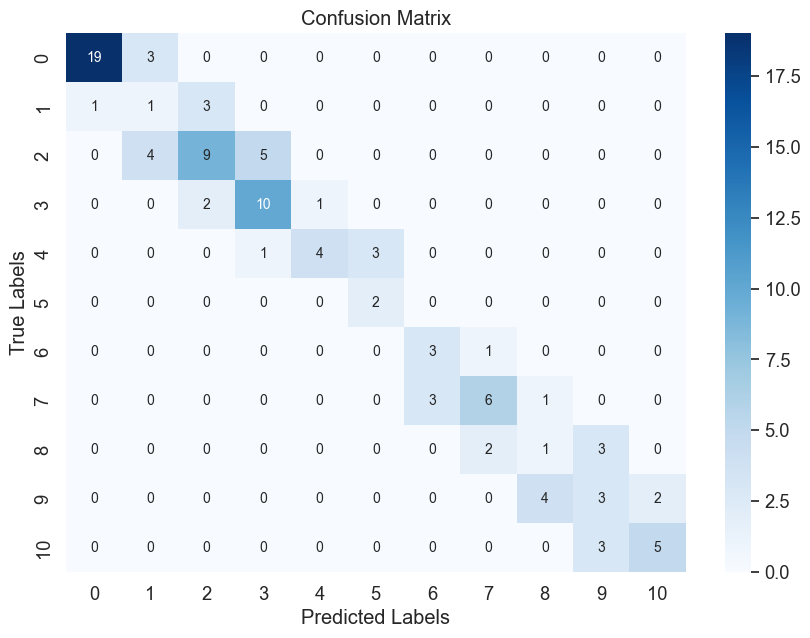

In [29]:
model = RandomForestClassifier(random_state=seed)
model.fit(X_trainPCAScaler, Y_trainScaler)

# Make predictions on the validation set
predictions = model.predict(X_validationPCAScaler)

# Function for calculating and plotting metrics
def metrics(Y_validation, predictions):
    # Calculate and print metrics
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions, average='weighted', zero_division=1))
    print('Recall:', recall_score(Y_validation, predictions, average='weighted', zero_division=1))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted', zero_division=1))
    print('\nClassification report:\n', classification_report(Y_validation, predictions, zero_division=1))
    
    # Confusion matrix
    cm = confusion_matrix(Y_validation, predictions)
    
    # Fix for the confusion matrix plotting
    unique_labels = sorted(set(Y_validation) | set(predictions))
    cm_df = pd.DataFrame(cm, index=unique_labels, columns=unique_labels)

    # Visualization
    plt.figure(figsize=(10, 7))  
    sn.set(font_scale=1.2)  # For label size  
    sn.heatmap(cm_df, annot=True, annot_kws={"size": 10}, fmt='g', cmap='Blues')  # Font size and format
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Call the metrics function with the true labels and predictions
metrics(Y_validationScaler, predictions)